In [1]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
from time import process_time

from EDAspy.optimization import EMNA, EGNA, SPEDA, UMDAc, MultivariateKEDA, UnivariateKEDA
from EDAspy.benchmarks import ContinuousBenchmarkingCEC14

In [2]:
n = 10
max_it = 100
dead_it = 100
l = 1
alpha = 0.4
size_gen = 300

bench = ContinuousBenchmarkingCEC14(n)

In [3]:
umda = UMDAc(size_gen=size_gen, max_iter=max_it, dead_iter=dead_it, n_variables=n)
start_time = process_time()
result_umda = umda.minimize(bench.cec14_4, output_runtime=False)
umda_time = process_time() - start_time
print('Best cost:', result_umda.best_cost, '\tTime:', umda_time)

	NFEVALS = 30000 F = 407.62133552904623
	X = [ -22.03030824   20.4734693  -117.1646298    -7.26539737   54.50689305
 -121.12712046    3.82320062   50.36067554   68.59674903  -33.81001868]
Best cost: 407.62133552904623 	Time: 23.09375


In [4]:
emna = EMNA(size_gen=size_gen, max_iter=max_it, dead_iter=dead_it, n_variables=n, landscape_bounds=(-100, 100))
start_time = process_time()
result_emna = emna.minimize(bench.cec14_4, output_runtime=False)
emna_time = process_time() - start_time
print('Best cost:', result_emna.best_cost, '\tTime:', emna_time)

	NFEVALS = 30000 F = 6142.233408706956
	X = [-41.11101537  47.7736926  -20.66972668 -58.4406567  -46.82206845
   0.44666075  44.14316859  46.06036171  -2.84834287 -77.90930769]
Best cost: 6142.233408706956 	Time: 23.0625


In [5]:
egna = EGNA(size_gen=size_gen, max_iter=max_it, dead_iter=dead_it, n_variables=n, landscape_bounds=(-100, 100))
start_time = process_time()
result_egna = egna.minimize(bench.cec14_4, output_runtime=False)
egna_time = process_time() - start_time
print('Best cost:', result_egna.best_cost, '\tTime:', egna_time)

	NFEVALS = 30000 F = 417.2396344967792
	X = [ -22.92997317   -0.76410113 -108.04332944    4.2382523    51.69399912
 -114.01567489    2.28492651   47.34879031   64.11418188  -23.61446099]
Best cost: 417.2396344967792 	Time: 26.1875


In [6]:
speda = SPEDA(size_gen=size_gen, max_iter=max_it, dead_iter=dead_it, n_variables=n, landscape_bounds=(-100, 100), l=l)
start_time = process_time()
result_speda = speda.minimize(bench.cec14_4, output_runtime=False)
speda_time = process_time() - start_time
print('Best cost:', result_speda.best_cost, '\tTime:', speda_time)

	NFEVALS = 30000 F = 425.4169026904972
	X = [ -35.65819276   -6.50216911 -114.07272462   11.54984489   58.38751379
 -105.1659747    15.43811739   49.59830392   62.2535715   -23.97796793]
Best cost: 425.4169026904972 	Time: 34.859375


In [7]:
keda = UnivariateKEDA(size_gen=size_gen, max_iter=max_it, dead_iter=dead_it, n_variables=n)
start_time = process_time()
result_u_keda = keda.minimize(bench.cec14_4, output_runtime=False)
u_keda_time = process_time() - start_time
print('Best cost:', result_u_keda.best_cost, '\tTime:', u_keda_time)

	NFEVALS = 30000 F = 403.701741242427
	X = [ -42.27024039   45.14598851 -103.92461531  -49.08271644   10.42577269
 -121.8560468    12.13563968   52.85976679   62.08220529  -23.50172013]
Best cost: 403.701741242427 	Time: 22.296875


In [8]:
keda = MultivariateKEDA(size_gen=size_gen, max_iter=max_it, dead_iter=dead_it, n_variables=n, landscape_bounds=(-100, 100), l=l)
start_time = process_time()
result_keda = keda.minimize(bench.cec14_4, output_runtime=False)
keda_time = process_time() - start_time
print('Best cost:', result_keda.best_cost, '\tTime:', keda_time)

	NFEVALS = 30000 F = 408.4912341498768
	X = [ -22.54651734    4.75484794 -115.74687039    0.88264011   57.33490967
 -121.39232673    3.12893281   50.63321638   68.7871684   -28.97663125]
Best cost: 408.4912341498768 	Time: 179.46875


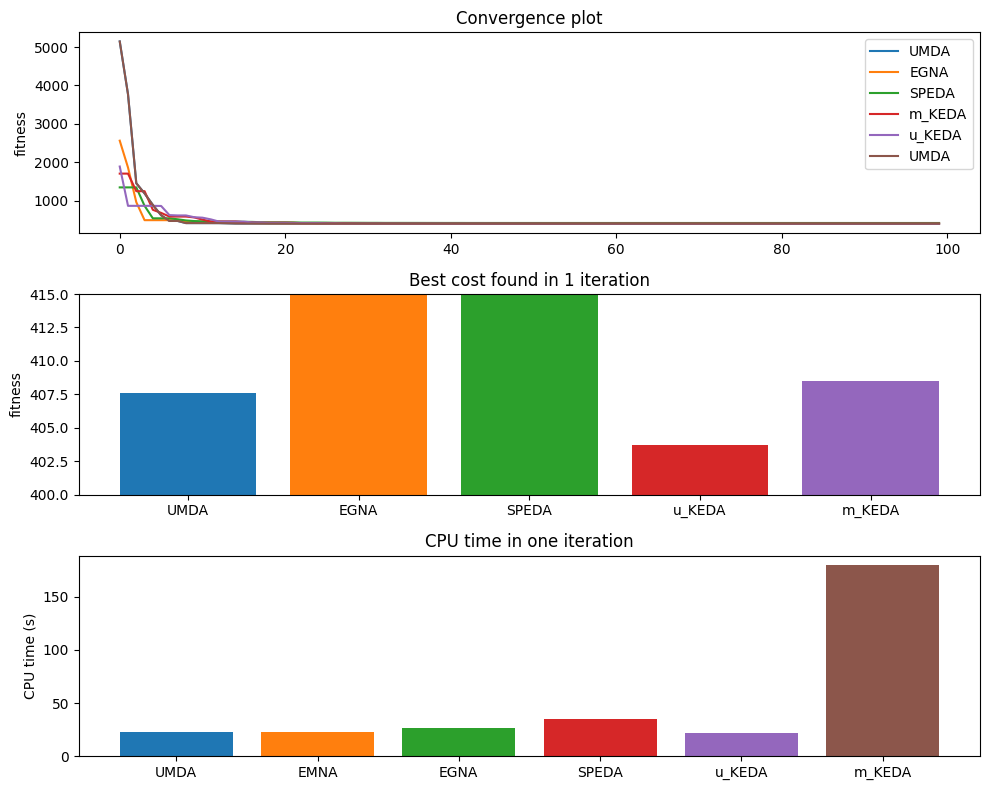

In [9]:
plt.figure(figsize=(10, 8))
plt.subplot(311)
plt.title('Convergence plot')
# plt.plot(range(max_it), result_emna.history, label='EMNA')
plt.plot(range(max_it), result_umda.history, label='UMDA')
plt.plot(range(max_it), result_egna.history, label='EGNA')
plt.plot(range(max_it), result_speda.history, label='SPEDA')
plt.plot(range(max_it), result_keda.history, label='m_KEDA')
plt.plot(range(max_it), result_u_keda.history, label='u_KEDA')
plt.plot(range(max_it), result_umda.history, label='UMDA')

plt.ylabel('fitness')

plt.legend()

plt.subplot(312)
plt.title('Best cost found in 1 iteration')
# plt.bar(0, result_emna.best_cost, label='EMNA')
plt.bar(0, result_umda.best_cost, label='UMDA')
plt.bar(1, result_egna.best_cost, label='EGNA')
plt.bar(2, result_speda.best_cost, label='SPEDA')
plt.bar(3, result_u_keda.best_cost, label='u_KEDA')
plt.bar(4, result_keda.best_cost, label='m_KEDA')

plt.ylim([400, 415])
plt.xticks([0, 1, 2, 3, 4], ['UMDA', 'EGNA', 'SPEDA', 'u_KEDA', 'm_KEDA'])
plt.ylabel('fitness')

plt.subplot(313)
plt.title('CPU time in one iteration')
plt.bar(-1, umda_time, label='UMDA')
plt.bar(0, emna_time, label='EMNA')
plt.bar(1, egna_time, label='EGNA')
plt.bar(2, speda_time, label='SPEDA')
plt.bar(3, u_keda_time, label='u_KEDA')
plt.bar(4, keda_time, label='m_KEDA')

plt.xticks([-1, 0, 1, 2, 3, 4], ['UMDA', 'EMNA', 'EGNA', 'SPEDA', 'u_KEDA', 'm_KEDA'])
plt.ylabel('CPU time (s)')

plt.tight_layout()
plt.savefig('cpu_comparison_continuous_opt.png')
plt.show()

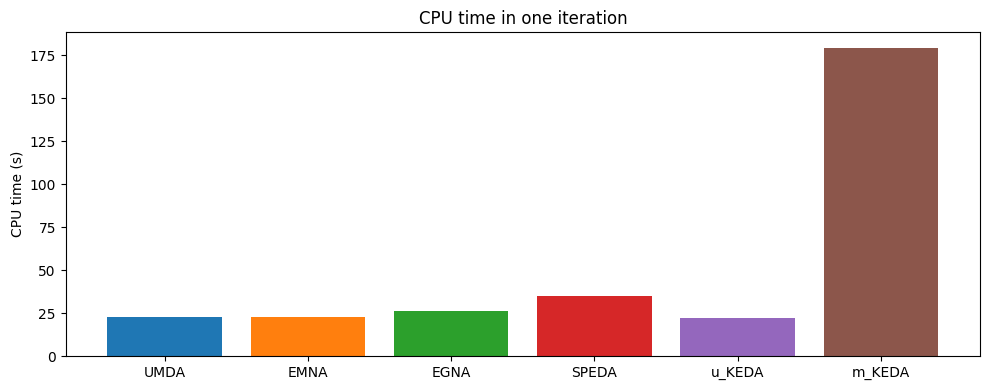

In [12]:
plt.figure(figsize=(10, 4))
plt.title('CPU time in one iteration')
plt.bar(-1, umda_time, label='UMDA')
plt.bar(0, emna_time, label='EMNA')
plt.bar(1, egna_time, label='EGNA')
plt.bar(2, speda_time, label='SPEDA')
plt.bar(3, u_keda_time, label='u_KEDA')
plt.bar(4, keda_time, label='m_KEDA')

plt.xticks([-1, 0, 1, 2, 3, 4], ['UMDA', 'EMNA', 'EGNA', 'SPEDA', 'u_KEDA', 'm_KEDA'])
plt.ylabel('CPU time (s)')

plt.tight_layout()
plt.savefig('cpu_comparison_continuous_opt.jpeg', transparent=False)
plt.show()